In [12]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [13]:
csv_filename = 'data/year-sunspots-republicans.csv'
years  = []
republican_counts = []
sunspot_counts = []

In [14]:
with open(csv_filename, 'r') as csv_fh:

    # Parse as a CSV file.
    reader = csv.reader(csv_fh)

    # Skip the header line.
    next(reader, None)

    # Loop over the file.
    for row in reader:

        # Store the data.
        years.append(float(row[0]))
        sunspot_counts.append(float(row[1]))
        republican_counts.append(float(row[2]))

In [15]:
# Turn the data into numpy arrays.
years  = np.array(years)
republican_counts = np.array(republican_counts)
sunspot_counts = np.array(sunspot_counts)
last_year = 1985

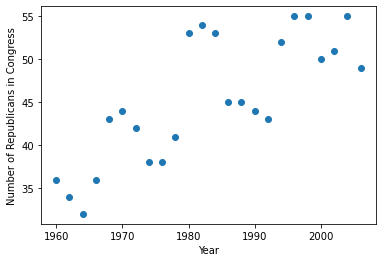

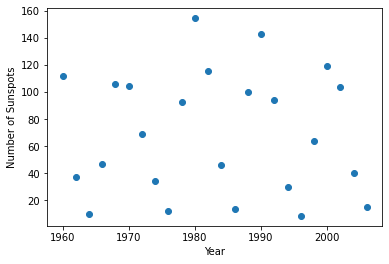

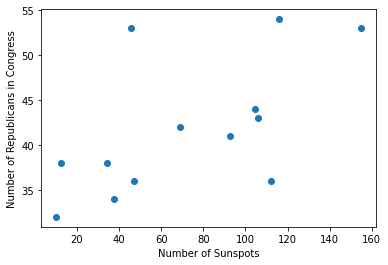

In [16]:
# Plot the data.
plt.figure(1)
plt.plot(years, republican_counts, 'o')
plt.xlabel("Year")
plt.ylabel("Number of Republicans in Congress")
plt.figure(2)
plt.plot(years, sunspot_counts, 'o')
plt.xlabel("Year")
plt.ylabel("Number of Sunspots")
plt.figure(3)
plt.plot(sunspot_counts[years<last_year], republican_counts[years<last_year], 'o')
plt.xlabel("Number of Sunspots")
plt.ylabel("Number of Republicans in Congress")
plt.show()

In [17]:
# Create the simplest basis, with just the time and an offset.
X = np.vstack((np.ones(years.shape), years)).T


In [18]:
sunspot_counts[years < last_year].shape

(13,)

In [19]:
# TODO: basis functions
# Based on the letter input for part ('a','b','c','d'), output numpy arrays for the bases.
# The shape of arrays you return should be: (a) 24x6, (b) 24x12, (c) 24x6, (c) 24x26
# xx is the input of years (or any variable you want to turn into the appropriate basis).
# is_years is a Boolean variable which indicates whether or not the input variable is
# years; if so, is_years should be True, and if the input varible is sunspots, is_years
# should be false
def make_basis(xx, part='a',is_years=True):
#DO NOT CHANGE LINES 65-69
    if part == 'a' and is_years:
        xx = (xx - np.array([1960]*len(xx)))/40
    
    if part == "a" and not is_years:
        xx = xx/20
    
    basis = np.ones(xx.shape)

    if part == 'a':
        for i in range(1, 6):
            basis = np.vstack((basis, np.power(xx, i)))

    elif part == 'b':
        v = np.vectorize(lambda x, y: np.exp(-(x-y)**2/25))
        for i in range(0, 55, 5):
            basis = np.vstack((basis, v(xx, 1960+i)))

    else:
        v = np.vectorize(lambda x, y: np.cos(x/y))
        if part == 'c':
            j = 6
        else:
            j = 26
        for i in range(1, j):
            basis = np.vstack((basis, v(xx, i)))
            
        
    return basis.T


In [20]:
for ch in ['a','b','c','d']:
    print(make_basis(years, part=ch).shape)

(24, 6)
(24, 12)
(24, 6)
(24, 26)


In [21]:
for ch in ['a', 'c','d']:
    print(make_basis(sunspot_counts[years < last_year], part=ch, is_years = False).shape)

(13, 6)
(13, 6)
(13, 26)


In [22]:
# Nothing fancy for outputs.
Y = republican_counts

In [23]:
# Find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,Y):
    w = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, Y))
    return w

In [24]:
# Compute the regression line on a grid of inputs.
# DO NOT CHANGE grid_years!!!!!
grid_years = np.linspace(1960, 2005, 200)
grid_X = make_basis(grid_years)
grid_Yhat  = np.dot(find_weights(make_basis(years), Y), grid_X.T)


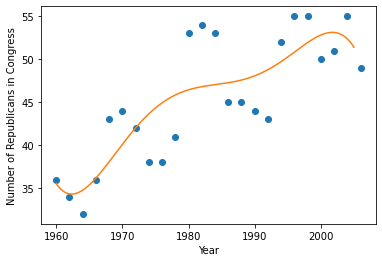

In [25]:
# TODO: plot and report sum of squared error for each basis

# Plot the data and the regression line.
plt.plot(years, republican_counts, 'o', grid_years, grid_Yhat, '-')
plt.xlabel("Year")
plt.ylabel("Number of Republicans in Congress")
plt.show()

In [26]:
data = []
for ch in ['a', 'b', 'c', 'd']:
    data.append(np.dot(find_weights(make_basis(years, part=ch), Y), make_basis(grid_years, part = ch).T))

labels = ['a', 'b', 'c', 'd']

colors = ['red', 'green', 'blue', 'grey']

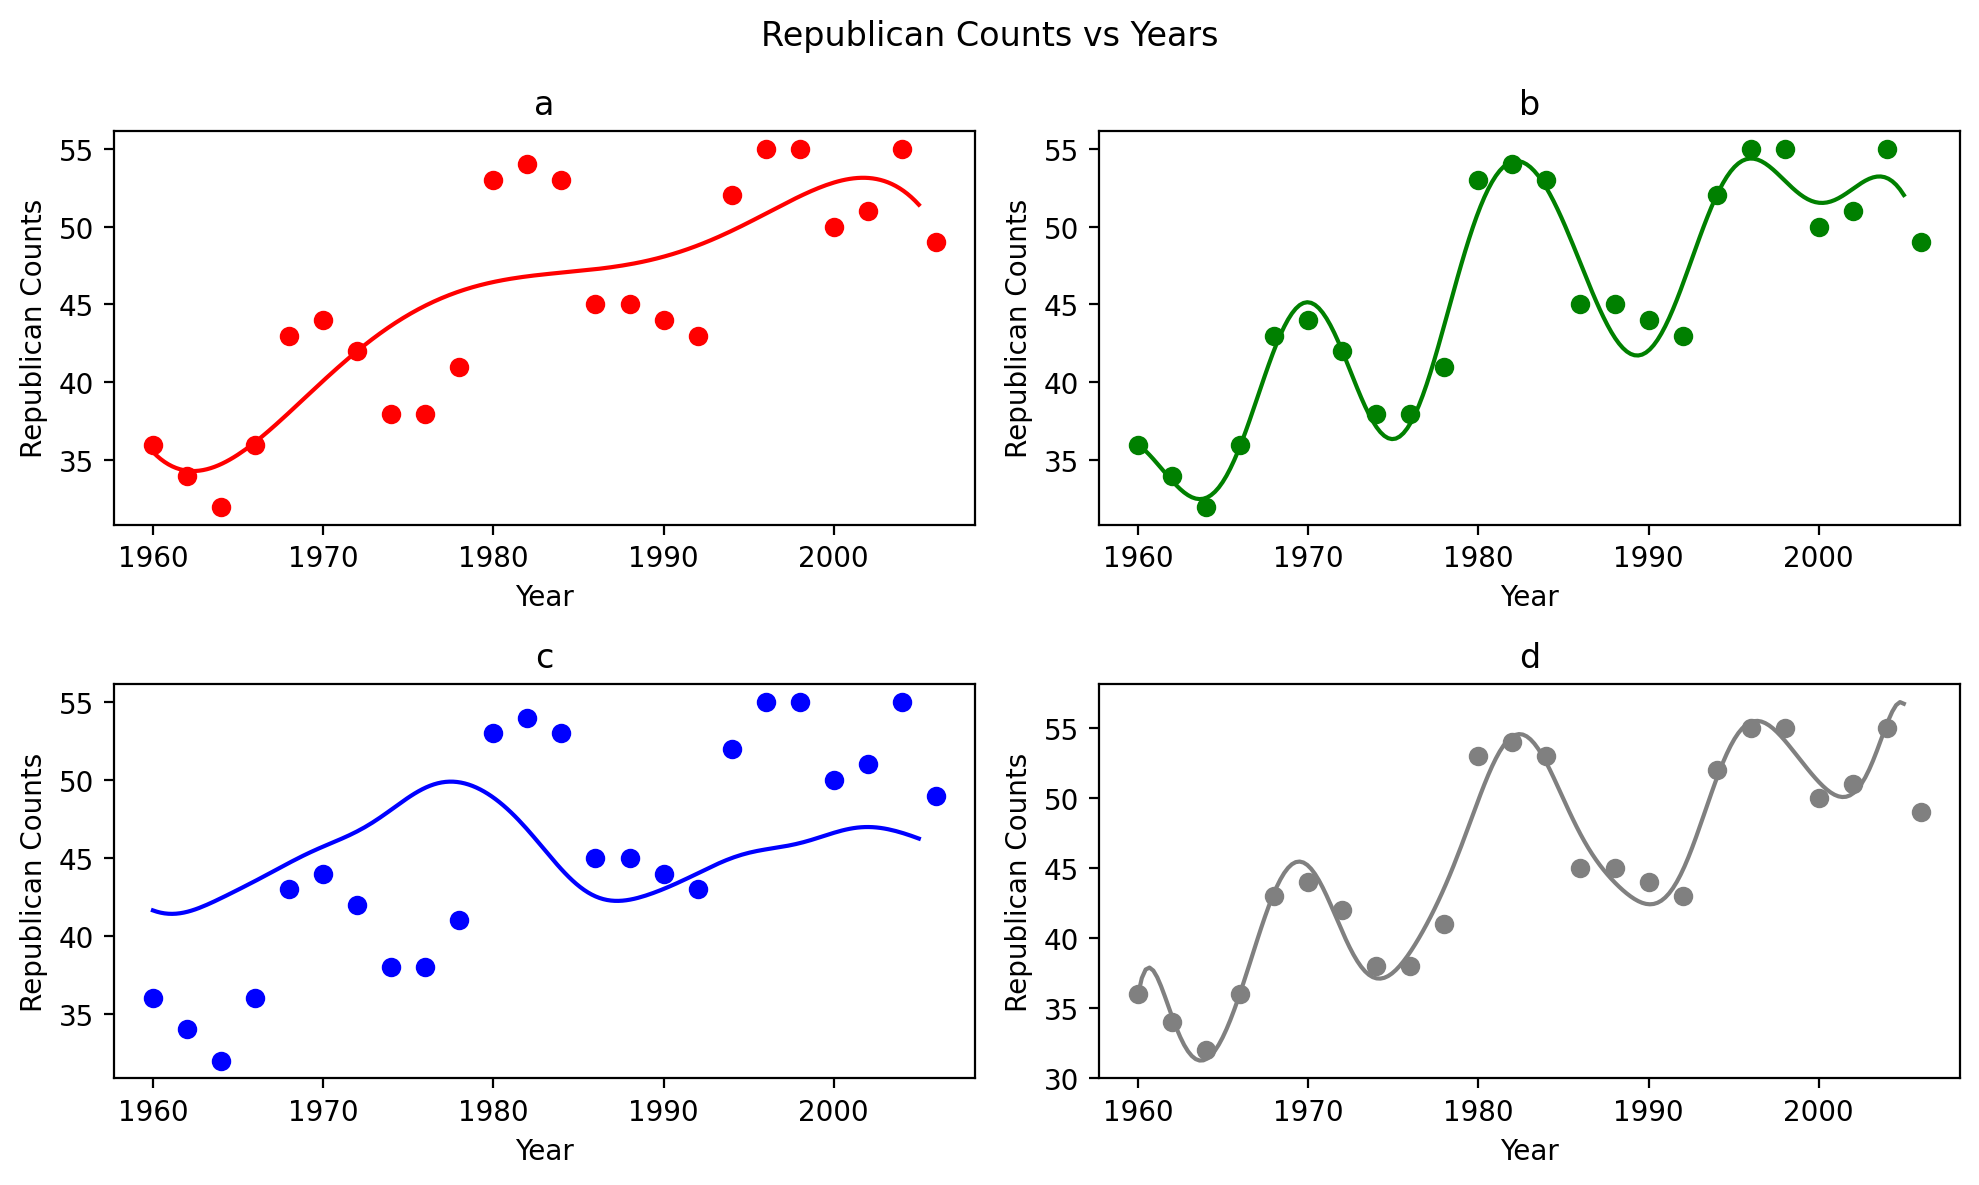

In [27]:

plt.figure(figsize=(10, 6), dpi=200)

for i in range(1, 5, 1):
    plt.subplot(2, 2, i)
    plt.plot(years, Y, 'o', grid_years, data[i-1], color=colors[i-1])
    plt.xlabel("Year")
    plt.ylabel("Republican Counts")
    plt.title(labels[i-1])
    
plt.suptitle("Republican Counts vs Years")
plt.tight_layout()
plt.savefig("PS1_P4_countsvsyears.png", facecolor="white")
plt.show()


In [29]:
# TODO: plot and report sum of squared error for each basis
squared_errors = []
for ch in ['a','b','c','d']:
    basis = make_basis(years, part = ch)
    weights = find_weights(basis, republican_counts)
    y_hat = np.dot(weights, basis.T)
    error = []
    for pred, real in zip(y_hat, republican_counts):
        error.append(np.square(pred - real))
    squared_errors.append((ch, sum(error)))

In [30]:
squared_errors

[('a', 394.9803839890881),
 ('b', 54.273096616719556),
 ('c', 1082.8088559867188),
 ('d', 39.001103560787676)]

In [31]:
Y_sunspots = republican_counts[years < last_year]
X_sunspots = sunspot_counts[years < last_year]

In [32]:
# Compute the regression line on a grid of inputs.
# DO NOT CHANGE grid_years!!!!!
grid_sunspots = np.linspace(0, 160, 200)
grid_X_sunspots = make_basis(grid_sunspots, is_years = False)
grid_Yhat_sunspots  = np.dot(find_weights(make_basis(X_sunspots, is_years = False), Y_sunspots), grid_X_sunspots.T)


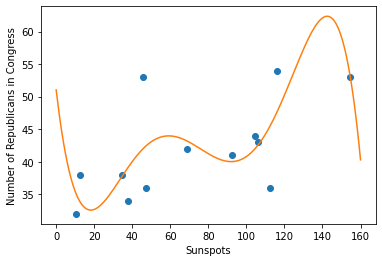

In [33]:
# TODO: plot and report sum of squared error for each basis

# Plot the data and the regression line.
plt.plot(X_sunspots, Y_sunspots, 'o', grid_sunspots, grid_Yhat_sunspots, '-')
plt.xlabel("Sunspots")
plt.ylabel("Number of Republicans in Congress")
plt.show()

In [34]:
data_sunspots = []
for ch in ['a','c', 'd']:
    data_sunspots.append(np.dot(find_weights(make_basis(X_sunspots, part=ch, is_years = False), Y_sunspots), make_basis(grid_sunspots, part = ch, is_years = False).T))

labels = ['a', 'c', 'd']

colors = ['red', 'blue', 'grey']

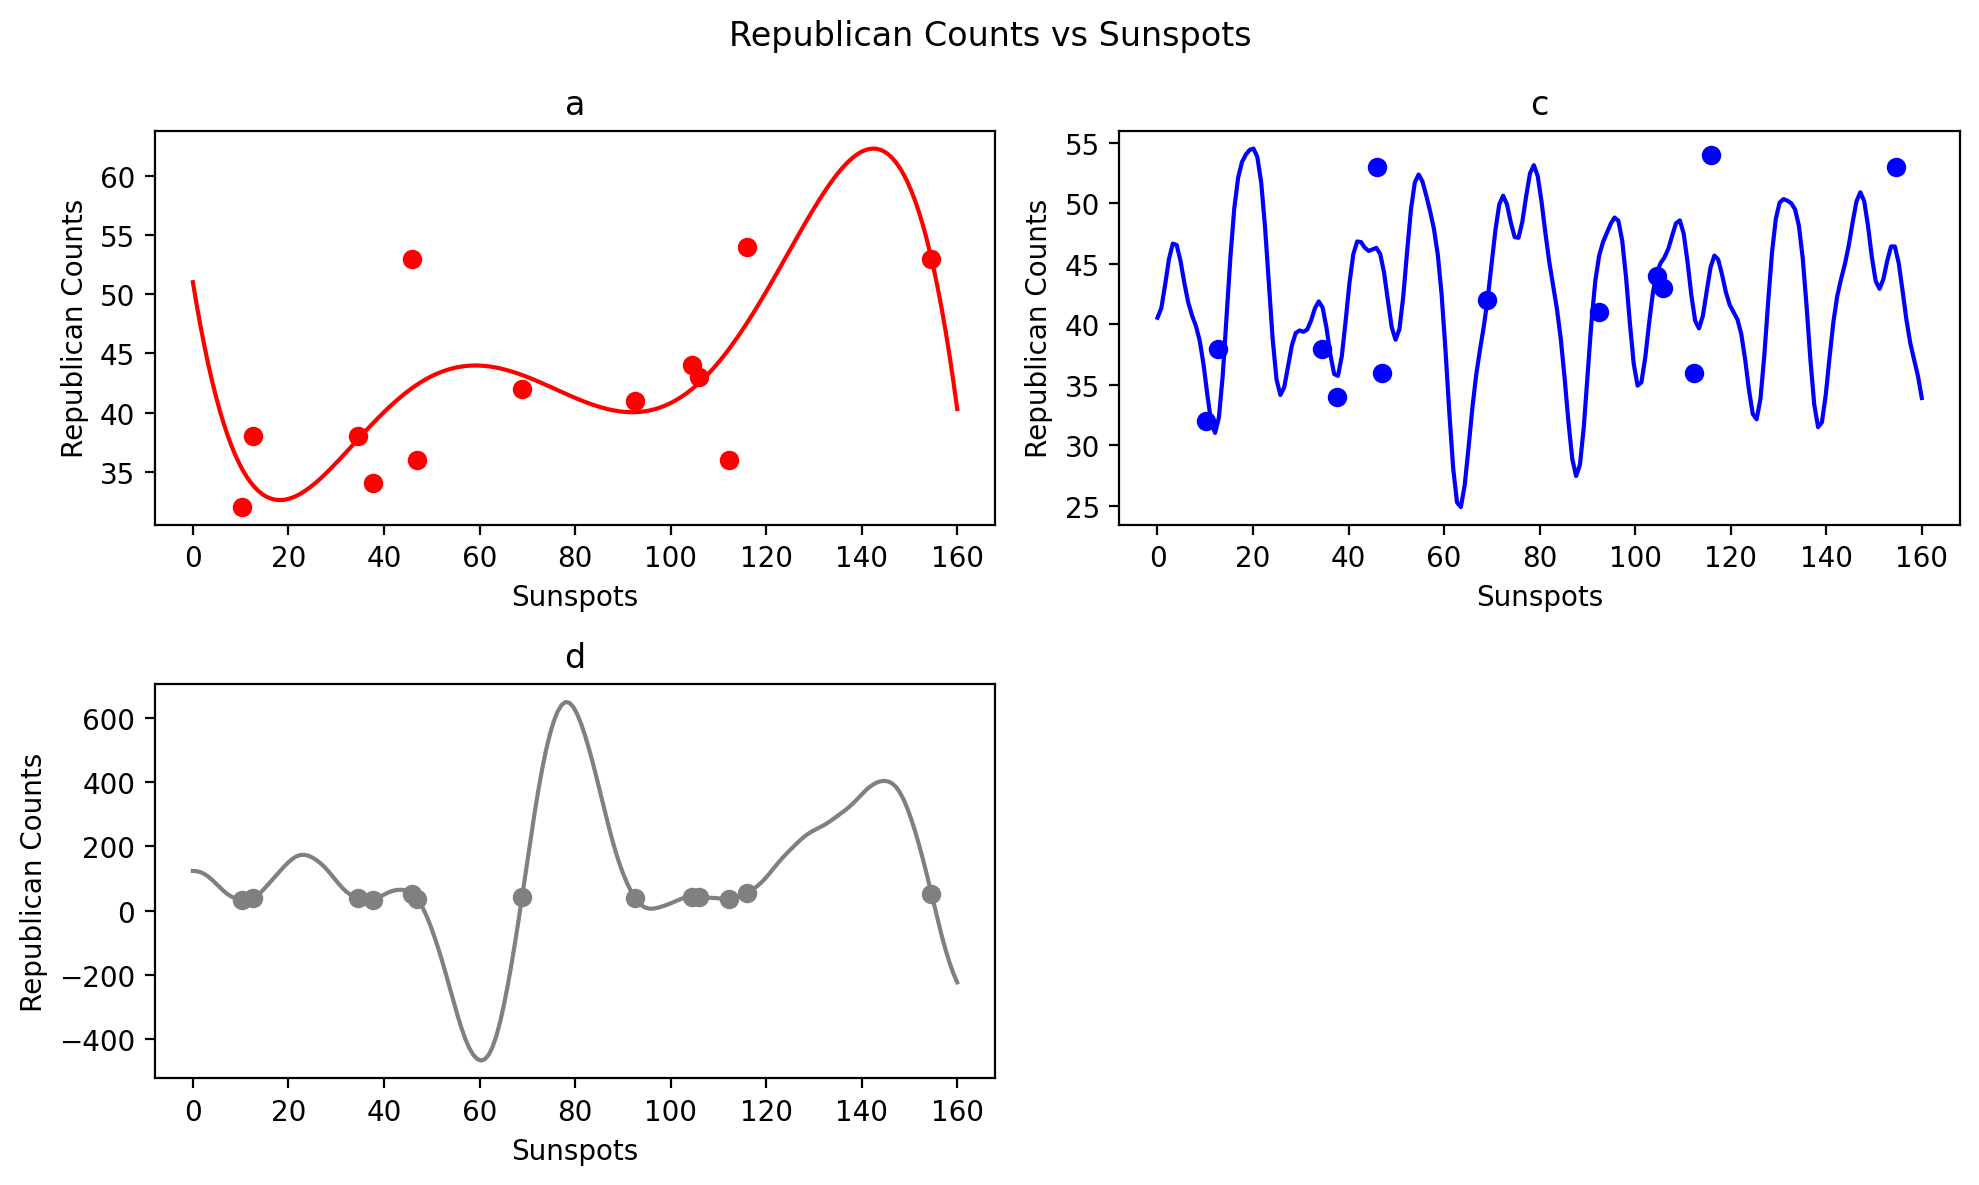

In [35]:
plt.figure(figsize=(10, 6), dpi=200)

for i in range(1, 4, 1):
    plt.subplot(2, 2, i)
    plt.plot(X_sunspots, Y_sunspots, 'o', grid_sunspots, data_sunspots[i-1], color=colors[i-1])
    plt.xlabel("Sunspots")
    plt.ylabel("Republican Counts")
    plt.title(labels[i-1])
    
plt.suptitle("Republican Counts vs Sunspots")
plt.tight_layout()
plt.savefig("PS1_P4_countsvssunspots.png", facecolor="white")
plt.show()


In [36]:
# TODO: plot and report sum of squared error for each basis
squared_errors = []
for ch in ['a','c','d']:
    basis = make_basis(X_sunspots, part = ch, is_years=False)
    weights = find_weights(basis, Y_sunspots)
    y_hat = np.dot(weights, basis.T)
    error = []
    for pred, real in zip(y_hat, Y_sunspots):
        error.append((pred - real)**2)
    squared_errors.append((ch, sum(error)))

In [37]:
squared_errors

[('a', 351.227935774181),
 ('c', 375.106757781674),
 ('d', 1.4063485566756565e-21)]